# Do Ocean Worlds have stable climates?

If small rocky planet were covered in a planet spanning ocean, would it have a stable climate? The dominant source of silicate weathering for a planet covered in ~99% water or more would be seafloor weathering. Hence we must look at what happens to a planet with its carbon cycle entirely controlled by ocean chemistry. Previous studies of seafloor weathering only consider the kinetics of the reaction. However, seafloor weathering is likely to be thermodynamically limited. Hence, we apply a newer weathering model to the problem.

## Steady State Testing

To start we will find steady states of the slimate system by finding states where the weathering rate equals the outgassing rate for a range of instellations.  As outgassing rate is unknown we shall vary that too.

In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../src'))

from kamino.planet import planet
from kamino.constants import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
plot_width = 15 # in
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'figure.titlesize': 18})
plt.rcParams.update({'lines.linewidth': 2})

In [3]:
# instellation_range = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4])
instellation_range = np.linspace(0.2, 1.5, num=100)
outgassing_range = np.array([0.01, 0.1, 1.0, 10.0])
results_shape = (len(instellation_range), len(outgassing_range))
ocean_depth = 3000

We will first use the Maher & Chamberlain et al. (2014) or Walker et al. (1981) weathering model to provide a habitable zone baseline.

In [43]:
T_baseline = np.zeros(len(instellation_range))
pco2_baseline = np.zeros(len(instellation_range))
T_weather_baseline = np.zeros(len(instellation_range))

for i, s in enumerate(instellation_range):
    
    try:
        pl = planet(1e5, 3000, s, 1, 0.05, 50e6, 100, use_MAC_weathering=True, albedo=0.05)
        T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
    except ValueError:
        T_s, pco2, weathering = np.nan, np.nan, np.nan

    T_baseline[i] = T_s
    pco2_baseline[i] = pco2 * 1e-5 # convert to bar
    T_weather_baseline[i] = weathering

Surface Temperature  : 190 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 193 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 197 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 200 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 203 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 207 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 210 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 213 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 216 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 219 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 222 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 225 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 228 K
P_CO2                : 1.3e+04 Pa
Surface Temperature  : 231 K
P_CO2                : 1.3e+04 Pa
No solution.
Surface Temperature  : 257 K
P_CO2                : 9.8e+04 Pa
Surface Temperature  : 257 K
P_CO2        

In [5]:
T_rapid_KT18 = np.zeros(results_shape)
pco2_rapid_KT18 = np.zeros(results_shape)
T_weather_rapid_KT18 = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100, use_WHAK_weathering=True)
            T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_rapid_KT18[i, j] = T_s
        pco2_rapid_KT18[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_rapid_KT18[i, j] = weathering

Surface Temperature  : 186 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 190 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 188 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 193 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 190 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 195 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 192 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 198 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 195 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 200 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 197 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 203 K
P_CO2                : 7.1e+02 Pa
No solution.
No solution.
Surface Temperature  : 199 K
P_CO2                : 3.3e-01 Pa
Surface Temperature  : 20

In [6]:
T_rapid_H21 = np.zeros(results_shape)
pco2_rapid_H21 = np.zeros(results_shape)
T_weather_rapid_H21 = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100)
            T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_rapid_H21[i, j] = T_s
        pco2_rapid_H21[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_rapid_H21[i, j] = weathering

No solution.
No solution.
Surface Temperature  : 185 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 186 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 187 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 188 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 189 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 190 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 191 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 192 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 194 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 197 K
P_CO2                : 3.3e

In [7]:
T_tidal_KT18 = np.zeros(results_shape)
pco2_tidal_KT18 = np.zeros(results_shape)
T_weather_tidal_KT18 = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100, tidally_locked=True, use_KT18_weathering=True)
            T_s, pco2, _, _, _, weathering = pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_tidal_KT18[i, j] = T_s
        pco2_tidal_KT18[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_tidal_KT18[i, j] = weathering

Surface Temperature  : 206 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 196 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 209 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 201 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 212 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 206 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 215 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 211 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 218 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 216 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 220 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 221 K
P_CO2                : 7.6e+02 Pa
No solution.
No solution.
Surface Temperature  : 223 K
P_CO2                : 3.4e-02 Pa
Surface Temperature  : 22

In [8]:
T_tidal_H21 = np.zeros(results_shape)
pco2_tidal_H21 = np.zeros(results_shape)
T_weather_tidal_H21 = np.zeros(results_shape)

for i, s in enumerate(instellation_range):
    for j, outgas in enumerate(outgassing_range):
    
        try:
            pl = planet(1e5, ocean_depth, s, outgas, 0.05, 50e6, 100, tidally_locked=True)
            T_s, pco2, _, _, _, weathering = pl.find_steady_state_no_evolution(diagnostic_plots=False)
        except ValueError:
            T_s, pco2, weathering = np.nan, np.nan, np.nan

        T_tidal_H21[i, j] = T_s
        pco2_tidal_H21[i, j] = pco2 * 1e-5 # convert to bar
        T_weather_tidal_H21[i, j] = weathering

No solution.
No solution.
Surface Temperature  : 206 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 209 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 212 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 215 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 218 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 220 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 223 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 226 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 229 K
P_CO2                : 3.3e-02 Pa
No solution.
No solution.
No solution.
Surface Temperature  : 231 K
P_CO2                : 3.3e

In [9]:
# T_rapid_new = np.zeros(results_shape)
# pco2_rapid_new = np.zeros(results_shape)
# T_weather_rapid_new = np.zeros(results_shape)

# for i, s in enumerate(instellation_range):
#     for j, outgas in enumerate(outgassing_range):
    
#         try:
#             pl = planet(1e5, 0.1 * ocean_depth, s, outgas, 0.05, 50e6, 100)
#             T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
#         except ValueError:
#             T_s, pco2, weathering = np.nan, np.nan, np.nan

#         T_rapid_new[i, j] = T_s
#         pco2_rapid_new[i, j] = pco2 * 1e-5 # convert to bar
#         T_weather_rapid_new[i, j] = weathering

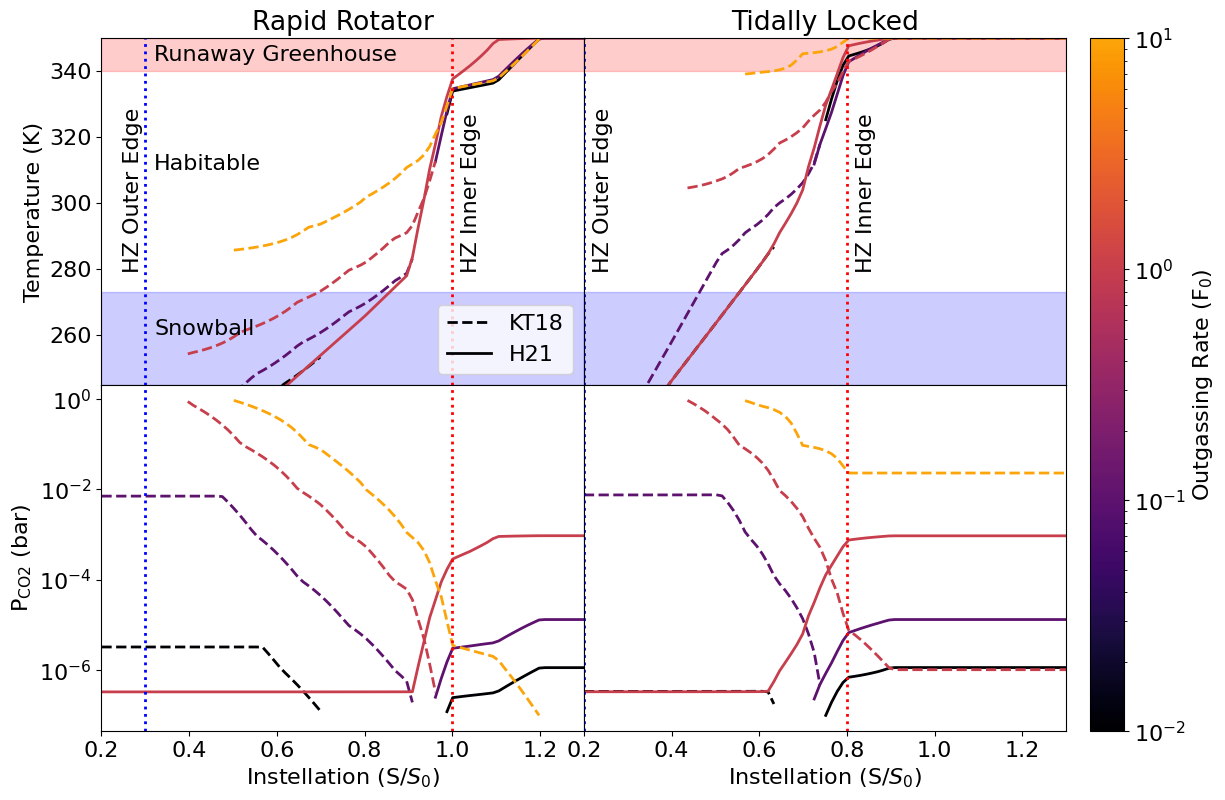

In [97]:
# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})
fig, axs= plt.subplots(2, 2, sharex=True, figsize=(plot_width, 0.6*plot_width), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})

ax1 = axs[0,0]
ax2 = axs[1,0]
ax3 = axs[0,1]
ax4 = axs[1,1]


inferno = mpl.colormaps['inferno']

colors = inferno(np.linspace(0, 0.8, 256))
cmap = mpl.colors.LinearSegmentedColormap.from_list('darker_inferno', colors)
# norm = mpl.colors.Normalize(vmin=min(outgassing_range), vmax=max(outgassing_range))
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

norm = mpl.colors.LogNorm(vmin=min(outgassing_range), vmax=max(outgassing_range))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# ax1.plot(instellation_range, T_baseline, color='black', label='Earth-like Continental Weathering', linestyle=':')
# ax2.plot(instellation_range, pco2_baseline, color='black', linestyle=':')

for i, outgas in enumerate(outgassing_range):

    if i == 0:
        ax1.plot(instellation_range, T_rapid_KT18[:, i], color=cmap(norm(outgas)), label='KT18', linestyle='--')
        ax1.plot(instellation_range, T_rapid_H21[:, i], color=cmap(norm(outgas)), label='H21')
    else:
        ax1.plot(instellation_range, T_rapid_KT18[:, i], color=cmap(norm(outgas)), linestyle='--')
        ax1.plot(instellation_range, T_rapid_H21[:, i], color=cmap(norm(outgas)))

    ax2.plot(instellation_range, pco2_rapid_H21[:, i], color=cmap(norm(outgas)))
    ax2.plot(instellation_range, pco2_rapid_KT18[:, i], color=cmap(norm(outgas)), linestyle='--')

    if i == 0:
        ax3.plot(instellation_range, T_tidal_KT18[:, i], color=cmap(norm(outgas)), linestyle='--')
        ax3.plot(instellation_range, T_tidal_H21[:, i], color=cmap(norm(outgas)))
    else:
        ax3.plot(instellation_range, T_tidal_KT18[:, i], color=cmap(norm(outgas)), linestyle='--')
        ax3.plot(instellation_range, T_tidal_H21[:, i], color=cmap(norm(outgas)))

    ax4.plot(instellation_range, pco2_tidal_H21[:, i], color=cmap(norm(outgas)))
    ax4.plot(instellation_range, pco2_tidal_KT18[:, i], color=cmap(norm(outgas)), linestyle='--')

# ax1.scatter(1, 288, c='black')
ax1.set_ylabel('Temperature (K)')
ax1.set_xlim(np.min(instellation_range), np.max(instellation_range))

ax1.set_ylim(245, 350)
ax3.set_ylim(245, 350)

ax1.set_xlim(0.4, 1.3)
ax3.set_xlim(0.2, 1.3)
ax2.set_xlim(0.4, 1.3)
ax4.set_xlim(0.2, 1.3)

ax1.axhspan(340, 350, color='red', alpha=0.2)
ax1.axhspan(273, 200, color='blue', alpha=0.2)
ax3.axhspan(340, 360, color='red', alpha=0.2)
ax3.axhspan(273, 200, color='blue', alpha=0.2)

ax1.axvline(1.0, color='red', linestyle=':')
ax1.axvline(0.3, color='blue', linestyle=':')
ax2.axvline(1.0, color='red', linestyle=':')
ax2.axvline(0.3, color='blue', linestyle=':')
ax3.axvline(0.8, color='red', linestyle=':', label='HZ Inner Edge')
ax3.axvline(0.2, color='blue', linestyle=':', label='HZ Outer Edge')
ax4.axvline(0.8, color='red', linestyle=':')
ax4.axvline(0.2, color='blue', linestyle=':')

ax1.text(0.32, 343, 'Runaway Greenhouse')
ax1.text(0.32, 310, 'Habitable')
ax1.text(0.32, 260, 'Snowball')

ax1.legend(loc='lower right')

# ax2.scatter(1, 280e-6, c='black', label='Earth')
ax2.set_ylabel('$\\text{P}_{\\text{CO2}}$ (bar)')
ax2.set_yscale('log')
ax4.set_yscale('log')

ax3.set_yticks([])
ax4.set_yticks([])

ax2.set_xlabel('Instellation (S/$S_0$)')
ax4.set_xlabel('Instellation (S/$S_0$)')

ax1.set_title('Rapid Rotator')
ax3.set_title('Tidally Locked')

ax1.text(0.25, 280, 'HZ Outer Edge', rotation='vertical')
ax1.text(1.02, 280, 'HZ Inner Edge', rotation='vertical')

ax3.text(0.22, 280, 'HZ Outer Edge', rotation='vertical')
ax3.text(0.82, 280, 'HZ Inner Edge', rotation='vertical')

cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', pad=0.02)
cbar.set_label('Outgassing Rate ($\\text{F}_{0}$)')

plt.savefig('steady_states.pdf', bbox_inches='tight')
plt.show()

In [11]:
# # fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 9), gridspec_kw={'hspace': 0.0})
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(plot_width, 1.5 * plot_width), gridspec_kw={'hspace': 0.0})

# cmap = mpl.colormaps['inferno']
# # norm = mpl.colors.Normalize(vmin=min(outgassing_range), vmax=max(outgassing_range))
# # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# # sm.set_array([])

# norm = mpl.colors.LogNorm(vmin=min(outgassing_range), vmax=max(outgassing_range))
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

# # ax1.plot(instellation_range, T_baseline, color='black', label='Earth-like Continental Weathering', linestyle=':')
# # ax2.plot(instellation_range, pco2_baseline, color='black', linestyle=':')

# for i, outgas in enumerate(outgassing_range):

#     if i == 0:
#         ax1.plot(instellation_range, T_rapid_new[:, i], color=cmap(norm(outgas)), label='Old Seafloor', linestyle='--')
#         ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)), label='New Seafloor')
#     else:
#         ax1.plot(instellation_range, T_rapid_new[:, i], color=cmap(norm(outgas)), linestyle='--')
#         ax1.plot(instellation_range, T_rapid[:, i], color=cmap(norm(outgas)))

#     ax2.plot(instellation_range, pco2_rapid_new[:, i], color=cmap(norm(outgas)), linestyle='--')
#     ax2.plot(instellation_range, pco2_rapid[:, i], color=cmap(norm(outgas)))

# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation='vertical', pad=0.02)
# cbar.set_label('Outgassing Rate ($\\text{F}_{0}$)')

# ax1.scatter(1, 288, c='black')
# ax1.set_ylabel('Temperature (K)')
# ax1.set_ylim(230, 360)
# ax1.set_xlim(np.min(instellation_range), np.max(instellation_range))

# ax1.axhspan(340, 360, color='red', alpha=0.2)
# ax1.axhspan(273, 200, color='blue', alpha=0.2)
# ax1.text(0.25, 350, 'Runaway Greenhouse')
# ax1.text(0.25, 310, 'Habitable')
# ax1.text(0.25, 250, 'Snowball')

# ax1.legend()

# ax2.scatter(1, 280e-6, c='black', label='Earth')
# ax2.set_ylabel('$P_{CO2}$ (bar)')
# ax2.set_yscale('log')

# ax2.set_xlabel('Instellation (S/$S_0$)')
# # ax3.set_ylabel('Weathering Temperature (K)')

# plt.show()

Running Depth Sweep...
Surface Temperature  : 338 K
P_CO2                : 3.4e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.4e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.4e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.4e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.4e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.3e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.3e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.3e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.3e+01 Pa
Surface Temperature  : 338 K
P_CO2                : 3.3e+01 Pa


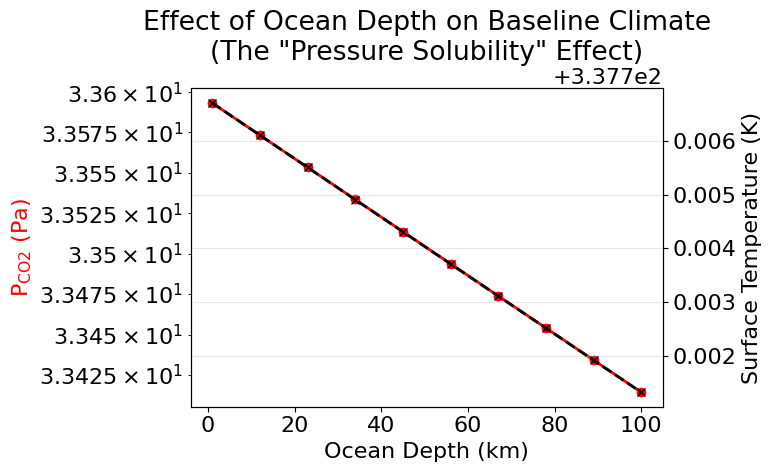

In [12]:
# Common Parameters
P_surf = 1e5
S0 = 1.0
volcano = 1.0
# Use the "stable" weathering (Arrhenius) to ensure we find steady states easily
# or use your standard one to see the "Hot House" shift more dramatically.
# We will use the standard one (False) to match your first model.
USE_MAC = False 

# ==========================================
# EXPERIMENT 1: THE PRESSURE COOKER
# Vary Depth, Measure Steady State
# ==========================================
depths = np.linspace(1.0, 100.0, 10) # 1km to 100km oceans
pco2_results = []
temp_results = []

print("Running Depth Sweep...")
for d in depths:
    # Initialize planet with specific depth
    pl = planet(P_surf, d, S0, volcano, 0.05, 50e6, 100, 
                use_MAC_weathering=USE_MAC)
    
    # Find steady state (using the algebraic solver for speed)
    # We use solve_chemistry=False just to get the climate state quickly
    try:
        T, P, _, _, _, _ = pl.find_steady_state_no_evolution()
        if np.isnan(T): raise ValueError
        pco2_results.append(P)
        temp_results.append(T)
    except:
        pco2_results.append(np.nan)
        temp_results.append(np.nan)

# Plot 1
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.set_xlabel('Ocean Depth (km)')
ax1.set_ylabel('$\\text{P}_{\\text{CO2}}$ (Pa)', color='red')
ax1.plot(depths, pco2_results, 'r-o', linewidth=2)
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_yscale('log')

ax2 = ax1.twinx()
ax2.set_ylabel('Surface Temperature (K)', color='black')
ax2.plot(depths, temp_results, 'k--x', linewidth=2)
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Effect of Ocean Depth on Baseline Climate\n(The "Pressure Solubility" Effect)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Do these worlds have stable climates?

We have found planets where the outgassing rates are equal to the weathering rates. Now we must see if these have stable climates. We will take a selection of these planets and test their stability. 

In [13]:
# T_rapid = np.zeros(results_shape)
# pco2_rapid = np.zeros(results_shape)
# T_weather_rapid = np.zeros(results_shape)

# for i, s in enumerate(instellation_range):
#     for j, outgas in enumerate(outgassing_range):
    
#         try:
#             pl = planet(1e5, 3000, s, outgas, 0.05, 50e6, 100)
#             T_s, pco2, _, _, _, weathering= pl.find_steady_state_no_evolution(diagnostic_plots=False)
#         except ValueError:
#             T_s, pco2, weathering = np.nan, np.nan, np.nan

#         T_rapid[i, j] = T_s
#         pco2_rapid[i, j] = pco2 * 1e-5 # convert to bar
#         T_weather_rapid[i, j] = weathering

## Weathering Analysis

The weathering rate is the most important climate feedback. Firstly we will compare several weathering models for different T and P_CO2 values.

In [14]:
from kamino.seafloor_weathering.weathering import *

n = 30

T_range = np.linspace(270, 340, num=n)
pco2_range = np.logspace(-2, 5, num=n)

In [15]:
W_H21 = np.zeros((n,n))
W_WHAK = np.zeros((n,n))
W_MAC = np.zeros((n,n))
W_KT18 = np.zeros((n,n))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):
        W_H21[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 50e6)
        W_WHAK[i, j] = get_weathering_rate_WHAK(1e5, T, pco2 / 1e5)
        W_MAC[i, j] = get_weathering_rate_MAC(T, pco2 / 1e5)
        W_KT18[i, j] = get_weathering_rate_KT18(1e5, T, pco2 / 1e5)

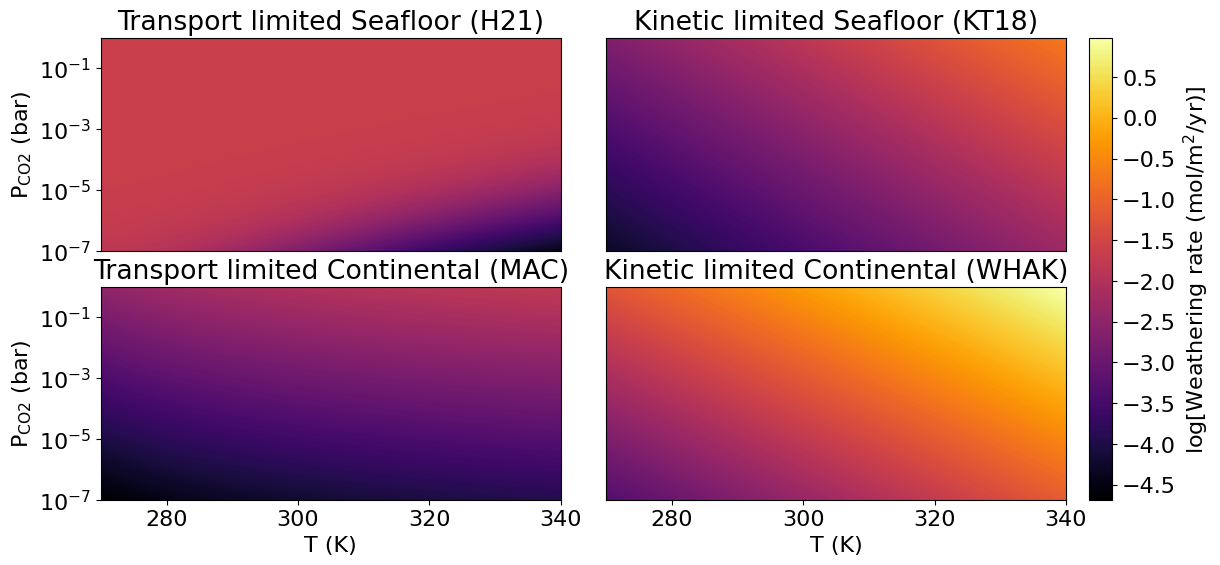

In [36]:
cmap = 'inferno'

all_data = [
    np.log10(W_H21.T), 
    np.log10(W_KT18.T), 
    np.log10(W_MAC.T), 
    np.log10(W_WHAK.T)
]
vmin = min(d.min() for d in all_data)
vmax = max(d.max() for d in all_data)

tick_min = np.ceil(2 * vmin) / 2
tick_max = np.floor(2 * vmax) / 2
round_ticks = np.arange(2 * tick_min, (2 * tick_max + 1)) / 2

# 2. Create shared levels based on this global range
# Using np.linspace ensures all plots use the exact same color boundaries
levels = np.linspace(vmin, vmax, 200)

fig, axes = plt.subplots(2, 2, figsize=(plot_width, 0.4*plot_width), gridspec_kw={'hspace': 0.17, 'wspace': 0.1})

# Subplot 0, 0
ax = axes[0, 0]
cf = ax.contourf(T_range, pco2_range / 1e5, np.log10(W_H21.T), levels=levels, cmap=cmap)
cf.set_edgecolor("face")
ax.set_title('Transport limited Seafloor (H21)')
ax.set_ylabel('$\\text{P}_{\\text{CO2}}$ (bar)')
ax.set_yscale('log')
ax.set_xticks([])

# Subplot 0, 1
ax = axes[0, 1]
cf = ax.contourf(T_range, pco2_range / 1e5, np.log10(W_KT18.T), levels=levels, cmap=cmap)
cf.set_edgecolor("face")
ax.set_title('Kinetic limited Seafloor (KT18)')
ax.set_yscale('log')
ax.set_xticks([])
ax.set_yticks([])

# Subplot 1, 0
ax = axes[1, 0]
cf = ax.contourf(T_range, pco2_range / 1e5, np.log10(W_MAC.T), levels=levels, cmap=cmap)
cf.set_edgecolor("face")
ax.set_title('Transport limited Continental (MAC)')
ax.set_xlabel('T (K)')
ax.set_ylabel('$\\text{P}_{\\text{CO2}}$ (bar)')
ax.set_yscale('log')

# Subplot 1, 1
ax = axes[1, 1]
cf = ax.contourf(T_range, pco2_range / 1e5, np.log10(W_WHAK.T), levels=levels, cmap=cmap)
cf.set_edgecolor("face")
ax.set_title('Kinetic limited Continental (WHAK)')
ax.set_xlabel('T (K)')
ax.set_yscale('log')
ax.set_yticks([])

# The colorbar now accurately represents the scale for all four plots
cbar = fig.colorbar(cf, ax=axes.ravel().tolist(), orientation='vertical', pad=0.02, ticks=round_ticks)
cbar.set_label('log[Weathering rate (mol/$\\text{m}^2$/yr)]')
plt.savefig('weathering_comparison.pdf', bbox_inches='tight')
plt.show()

In [17]:
def get_t_rock(rate):
    return 50e6 * rate ** -1

def get_fluid_flux(rate):
    return 0.05 * rate

In [18]:
r = 0.1
W_H21_1 = np.zeros((n,n))
W_therm_1 = np.zeros((n,n))
W_supp_1 = np.zeros((n,n))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):

        P = 1e5
        x_CO2 = pco2 / P
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = float(np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max()))
        T = float(np.clip(T, pr.T.min(), pr.T.max()))

        q = float(get_fluid_flux(0.01))
        t_s = float(get_t_rock(0.01))
        c_eq = get_C_eq(10, T, x_CO2)

        W_H21_1[j, i] = get_weathering_rate(1e6, T, x_CO2, q, 100, t_s)
        W_therm_1[j, i] = q * c_eq[0]
        W_supp_1[j, i] = w_supply(100, t_s)

r = 1
W_H21_2 = np.zeros((n,n))
W_therm_2 = np.zeros((n,n))
W_supp_2 = np.zeros((n,n))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):

        P = 1e5
        x_CO2 = pco2 / P
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = float(np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max()))
        T = float(np.clip(T, pr.T.min(), pr.T.max()))

        q = float(get_fluid_flux(1))
        t_s = float(get_t_rock(1))
        c_eq = get_C_eq(10, T, x_CO2)

        W_H21_2[j, i] = get_weathering_rate(1e6, T, x_CO2, q, 100, t_s)
        W_therm_2[j, i] = q * c_eq[0]
        W_supp_2[j, i] = w_supply(100, t_s)

r = 10
W_H21_3 = np.zeros((n,n))
W_therm_3 = np.zeros((n,n))
W_supp_3 = np.zeros((n,n))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):

        P = 1e5
        x_CO2 = pco2 / P
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = float(np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max()))
        T = float(np.clip(T, pr.T.min(), pr.T.max()))

        q = float(get_fluid_flux(100))
        t_s = float(get_t_rock(100))
        c_eq = get_C_eq(10, T, x_CO2)

        W_H21_3[j, i] = get_weathering_rate(1e6, T, x_CO2, q, 100, t_s)
        W_therm_3[j, i] = q * c_eq[0]
        W_supp_3[j, i] = w_supply(100, t_s)

r = 10
W_H21_4 = np.zeros((n,n))
W_therm_4 = np.zeros((n,n))
W_supp_4 = np.zeros((n,n))

for i, T in enumerate(T_range):
    for j, pco2 in enumerate(pco2_range):

        P = 1e5
        x_CO2 = pco2 / P
        P = float(P / 1e5) # convert to bar
        P = np.clip(P, pr.P.min(), pr.P.max())
        x_CO2 = float(np.clip(x_CO2, pr.xCO2.min(), pr.xCO2.max()))
        T = float(np.clip(T, pr.T.min(), pr.T.max()))

        q = 0.3
        t_s = 100e3

        c_eq = get_C_eq(10, T, x_CO2, granite=True)

        W_H21_4[j, i] = get_weathering_rate(1e6, T, x_CO2, q, 1, t_s, granite=True)
        W_therm_4[j, i] = q * c_eq[0]
        W_supp_4[j, i] = w_supply(100, t_s)

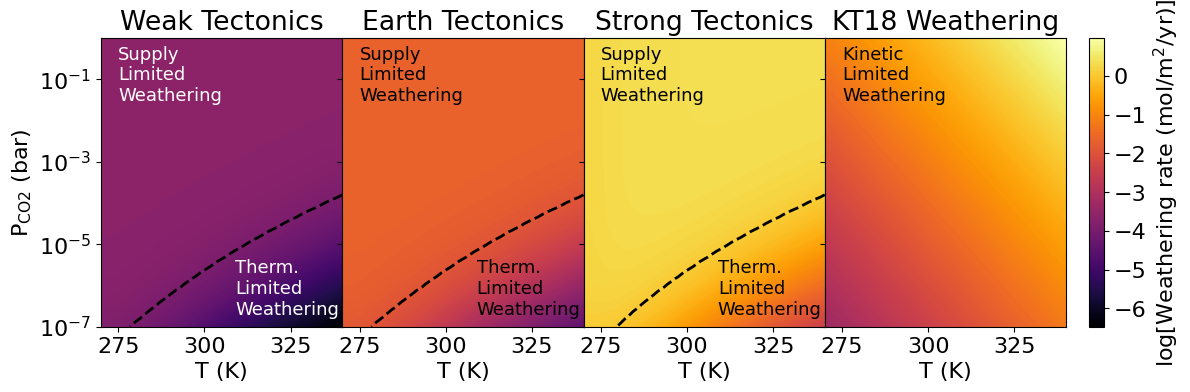

In [35]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(plot_width, 0.25*plot_width), gridspec_kw={'wspace': 0.0}, sharey=True)

axs = (ax1, ax2, ax3, ax4) 

all_vals = np.concatenate([np.log10(W_H21_1), np.log10(W_H21_2), np.log10(W_H21_3), np.log10(W_WHAK)])
min_val, max_val = all_vals.min(), all_vals.max()
levels = np.linspace(min_val, max_val, 200)

tick_min = np.ceil(min_val)
tick_max = np.floor(max_val)
round_ticks = np.arange(tick_min, (tick_max + 1))

CS = ax1.contourf(T_range, pco2_range / 1e5, np.log10(W_H21_1), levels, cmap='inferno')
CS.set_edgecolor("face")
ax1.text(275, 0.03, 'Supply\nLimited\nWeathering', color='white', fontsize=13)
ax1.text(309, 2e-7, 'Therm.\nLimited\nWeathering', color='white', fontsize=13)
ax1.contour(T_range, pco2_range / 1e5, np.log10(W_H21_1 / W_therm_1), [-0.3], colors='black')
# ax1.contour(T_range, pco2_range / 1e5, np.log10(W_H21_1 / W_supp_1), [-0.3], colors='black')

CS = ax2.contourf(T_range, pco2_range / 1e5, np.log10(W_H21_2), levels, cmap='inferno')
CS.set_edgecolor("face")
ax2.text(275, 0.03, 'Supply\nLimited\nWeathering', color='black', fontsize=13)
ax2.text(309, 2e-7, 'Therm.\nLimited\nWeathering', color='black', fontsize=13)
ax2.contour(T_range, pco2_range / 1e5, np.log10(W_H21_2 / W_therm_2), [-0.3], colors='black')
# ax2.contour(T_range, pco2_range / 1e5, np.log10(W_H21_2 / W_supp_2), [-0.3], colors='black')

CS = ax3.contourf(T_range, pco2_range / 1e5, np.log10(W_H21_3), levels, cmap='inferno')
CS.set_edgecolor("face")
ax3.text(275, 0.03, 'Supply\nLimited\nWeathering', color='black', fontsize=13)
ax3.text(309, 2e-7, 'Therm.\nLimited\nWeathering', color='black', fontsize=13)
ax3.contour(T_range, pco2_range / 1e5, np.log10(W_H21_3 / W_therm_3), [-0.3], colors='black')
# ax3.contour(T_range, pco2_range / 1e5, np.log10(W_H21_3 / W_supp_3), [-0.3], colors='black')

CS = ax4.contourf(T_range, pco2_range / 1e5, np.log10(W_WHAK), levels, cmap='inferno')
CS.set_edgecolor("face")
ax4.text(275, 0.03, 'Kinetic\nLimited\nWeathering', color='black', fontsize=13)

ax1.set_xlabel('T (K)')
ax2.set_xlabel('T (K)')
ax3.set_xlabel('T (K)')
ax4.set_xlabel('T (K)')

ax1.set_title('Weak Tectonics')
ax2.set_title('Earth Tectonics')
ax3.set_title('Strong Tectonics')
ax4.set_title('KT18 Weathering')

cbar = fig.colorbar(CS, ax=(ax1, ax2, ax3, ax4), orientation='vertical', pad=0.02)
cbar.set_label('log[Weathering rate (mol/$\\text{m}^2$/yr)]')
cbar.set_ticks(round_ticks)

ax1.set_ylabel('$\\text{P}_{\\text{CO2}}$ (bar)')
ax1.set_yscale('log')
plt.savefig('weathering_regimes.pdf', bbox_inches='tight')
plt.show()


Now lets add our climate model.

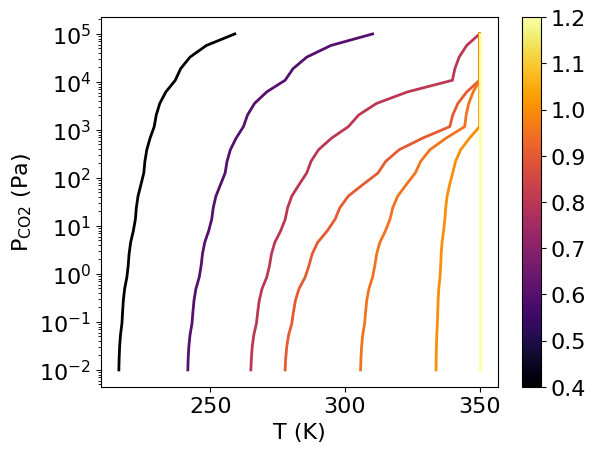

In [72]:
S_range = [0.4, 0.6, 0.8, 0.9, 0.95, 1.0, 1.2]

T_from_climate = np.zeros((len(pco2_range), len(S_range)))

for j, S in enumerate(S_range):
    pl = planet(1e5, 3000, S, 1, 0.05, 50e6, 100, tidally_locked=False)

    for i, pco2 in enumerate(pco2_range):
        T_res, _ = pl.solve_climate_from_CO2(pco2)
        T_from_climate[i, j] = T_res

cmap = mpl.colormaps['inferno']
norm = mpl.colors.Normalize(vmin=min(S_range), vmax=max(S_range))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()

for i, S in enumerate(S_range):
    ax.plot(T_from_climate[:, i], pco2_range, color=cmap(norm(S)))

ax.set_xlabel('T (K)')
ax.set_ylabel('$\\text{P}_{\\text{CO2}}$ (Pa)')

plt.colorbar(sm, ax=ax)
plt.yscale('log')
plt.show()

Let's look at the weathering rate as a function of P_CO2 with the climate model.

In [73]:
W_H21_pco2 = np.zeros((len(S_range), n))
W_WHAK_pco2 = np.zeros((len(S_range), n))
W_MAC_pco2 = np.zeros((len(S_range), n))
W_KT18_pco2 = np.zeros((len(S_range), n))

for i, S in enumerate(S_range):
    for j, pco2 in enumerate(pco2_range):
        T = T_from_climate[j, i]
        W_H21_pco2[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 50e6)
        W_WHAK_pco2[i, j] = get_weathering_rate_WHAK(1e5, T, pco2 / 1e5)
        W_MAC_pco2[i, j] = get_weathering_rate_MAC(T, pco2 / 1e5)
        W_KT18_pco2[i, j] = get_weathering_rate_KT18(1e5, T, pco2 / 1e5)

In [75]:
W_H21_T = np.zeros((len(S_range), n))
W_WHAK_T = np.zeros((len(S_range), n))
W_MAC_T = np.zeros((len(S_range), n))
W_KT18_T = np.zeros((len(S_range), n))

for i, S in enumerate(S_range):
    for j, T in enumerate(T_from_climate[:, i]):
        pco2 = pco2_range[j]
        W_H21_T[i, j] = get_weathering_rate(1e6, T, pco2 / 1e5, 0.05, 100, 50e6)
        W_WHAK_T[i, j] = get_weathering_rate_WHAK(1e5, T, pco2 / 1e5)
        W_MAC_T[i, j] = get_weathering_rate_MAC(T, pco2 / 1e5)
        W_KT18_T[i, j] = get_weathering_rate_KT18(1e5, T, pco2 / 1e5)

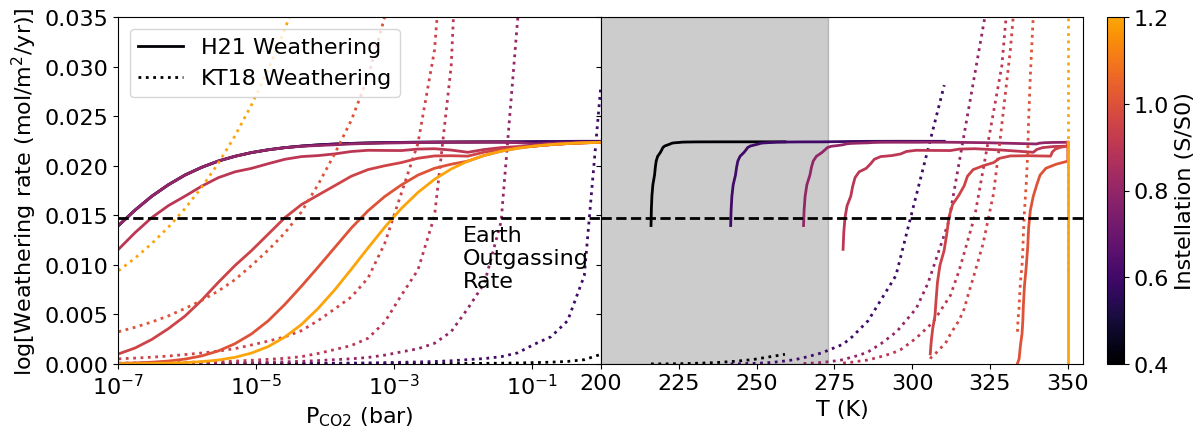

In [99]:
inferno = mpl.colormaps['inferno']

colors = inferno(np.linspace(0, 0.8, 256))
cmap = mpl.colors.LinearSegmentedColormap.from_list('darker_inferno', colors)

# cmap = mpl.colormaps['inferno']
norm = mpl.colors.Normalize(vmin=min(S_range), vmax=max(S_range))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a figure with 1 row and 2 columns, sharing the y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(plot_width, 0.3 * plot_width), sharey=True)
plt.subplots_adjust(wspace=0)

for i, S in enumerate(S_range):

    if i == 0:
        ax1.plot(pco2_range / 1e5, W_H21_pco2[i, :], color=cmap(norm(S)), linestyle='-', label='H21 Weathering')
        ax1.plot(pco2_range / 1e5, W_KT18_pco2[i, :], color=cmap(norm(S)), linestyle=':', label='KT18 Weathering')
    else:
        ax1.plot(pco2_range / 1e5, W_H21_pco2[i, :], color=cmap(norm(S)), linestyle='-')
        ax1.plot(pco2_range / 1e5, W_KT18_pco2[i, :], color=cmap(norm(S)), linestyle=':')
    
    ax2.plot(T_from_climate[:, i], W_H21_T[i, :], color=cmap(norm(S)), linestyle='-')
    ax2.plot(T_from_climate[:, i], W_KT18_T[i, :], color=cmap(norm(S)), linestyle=':')

ax1.axhline(0.0147, color='black', linestyle='--')
ax2.axhline(0.0147, color='black', linestyle='--')

ax2.axvspan(170, 273, color='black', alpha=0.2)
ax2.set_xlim([200, 355])

ax1.text(1e-2, 0.0077, 'Earth\nOutgassing\nRate')

ax1.set_ylabel('log[Weathering rate (mol/$\\text{m}^2$/yr)]')
ax1.set_xlabel('$\\text{P}_{\\text{CO2}}$ (bar)')
ax1.set_xscale('log')
ax1.set_xlim([1e-7, 1])
ax1.set_ylim([0, 0.035])
ax1.legend(loc='upper left')

ax2.set_xlabel('T (K)')

cbar = fig.colorbar(sm, ax=[ax1, ax2], label='Instellation (S/S0)', pad=0.02)

plt.savefig('weathering_response.pdf', bbox_inches='tight')
plt.show()